# Tugas

## Soal 1

Rancanglah filter LPF dengan $f_c$ = 1.5𝑘𝐻𝑧 dan $f_s$ = 8𝑘𝐻𝑧 dengan metode pole-zero placement

## Jawab Soal 1

Zero diletakkan pada -1

Sudut pole = $\frac{1.5}{8}*360\degree=67.5\degree$

Jarak pole bebas. Misal berdasarkan sumbu $x$ atau riil, ditentukan $x=0.5$. Maka, daerah imaginer

$ b = 0.5 * tan(67.5\degree) = 1.2$

Sehingga $pole_1 = 0.5 + 1.2j$ dan $pole_2 = 0.5 - 1.2j$

Maka nilai $H(z) = \frac{(z+1)^2}{(z-0.5-1.2j)(z-0.5+1.2j)}$

Mari sederhanakan nilai $H(z)$

In [1]:
import sympy as sp # library untuk symbolic

z = sp.symbols("z")

hz = sp.expand(((z+1)**2) / ((z-0.5)**2 + (1.2**2)))

sp.together(hz)

(z**2 + 2*z + 1)/(z**2 - 1.0*z + 1.69)

Jika dikaliakan dengan pangkat negatif didapatkan

$H(z) = \frac{1+2z^{-1}+z^{-2}}{1-1.0z^{-1}+1.69z^{-2}}$

## Soal 2a

Implementasi filter poin 1 dengan Python

## Jawab Soal 2a

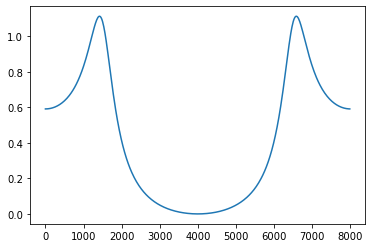

In [2]:
# Import library
from scipy import signal
import matplotlib.pyplot as plt

# definisi zero
b = [1, 2, 1]
# definisi pole
a = [1, -1, 1.69]
# definisi pengali k
k = 0.25 # supaya tidak lebih dari 1

# Cek frekuensi response
[w, h] = signal.freqz(b,a,fs=8000, whole=True)

# Plot frekuensi rensponse
plt.plot(w, k*abs(h))

## Soal 2b

Buat sinyal sinusoidal 500𝐻𝑧 dan 2000𝐻𝑧. Aplikasikan filter pada poin a pada sinyal tersebut, amati hasilanya, apakah sesuai dengan yang diharapkan

## Jawab Soal 2b

Sampling rate bebas.

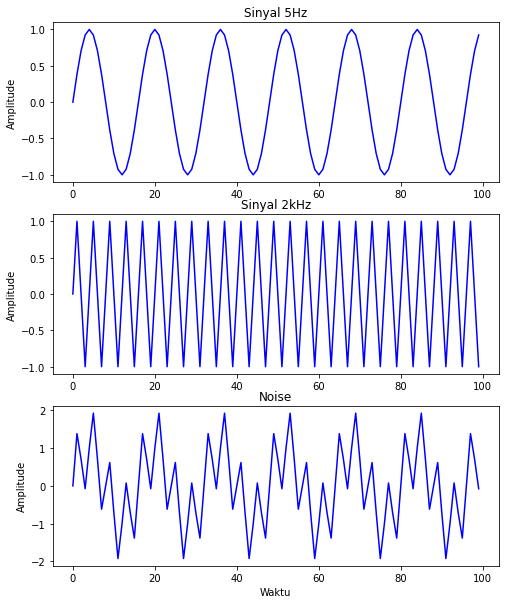

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fs = 8000
f1 = 500
f2 = 2000
# time
N = 100
time = np.arange(0, N, 1)


# 500 Hz
w1 = 2 * np.pi * f1 / fs
x1 = np.sin( w1 * time)

# 2000 Hz
w2 = 2 * np.pi * f2 / fs
x2 = np.sin( w2 * time)

# noise 500 + 2000 Hz
x3 = x1 + x2

# plot gambar
plt.figure(figsize = (8, 10))

plt.subplot(311, title='Sinyal 5Hz')
plt.plot(time, x1, 'b')
plt.ylabel('Amplitude')

plt.subplot(312, title='Sinyal 2kHz')
plt.plot(time, x2, 'b')
plt.ylabel('Amplitude')

plt.subplot(313, title='Noise')
plt.plot(time, x3, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Waktu')
plt.show()

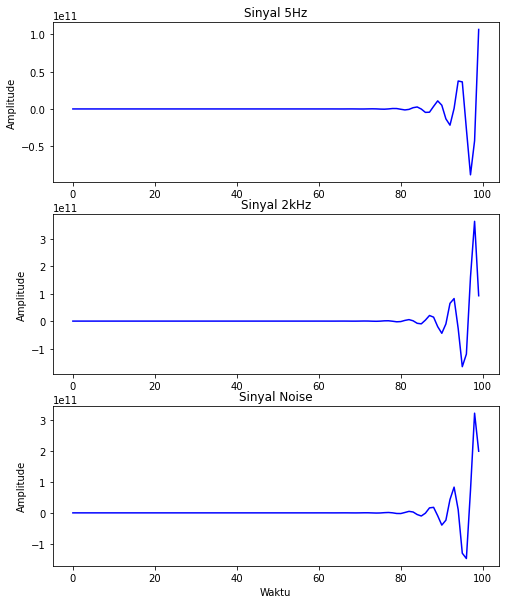

In [4]:
# filter ke 500 Hz
filter1 = signal.lfilter(b, a, x1)

# filter ke 2kHz
filter2 = signal.lfilter(b, a, x2)

# filter ke Noise
filter3 = signal.lfilter(b, a, x3)

# plot gambar
plt.figure(figsize = (8, 10))

plt.subplot(311, title='Sinyal 5Hz')
plt.plot(time, filter1, 'b')
plt.ylabel('Amplitude')

plt.subplot(312, title='Sinyal 2kHz')
plt.plot(time, filter2, 'b')
plt.ylabel('Amplitude')

plt.subplot(313, title='Sinyal Noise')
plt.plot(time, filter3, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Waktu')
plt.show()

## Soal 3

Desain filter dengan transformasi bilinier, dengan spesifikasi
- Tipe filter: HPF, Butterworth
- Passband ripple: 3 db
- Stopband attenuation: 10 db
- $f_c$: 2kHz
- $f_{stop}$: 1 kHz
- $f_s$: 10kHz

## Jawab Soal 3

### Normaliasi $f_s$

$\omega_{cn} = 2\pi \left( \frac{2kHz}{10kHz} \right) = 1.2566 $

$\omega_{stopn} = 2\pi \left( \frac{1kHz}{10kHz} \right) = 0.6283$

### Unwarp



In [5]:
import math

wc = 2 * math.tan(1.2566/2)
print(f'wc: {wc}')

wstop = 2 * math.tan(0.6283/2)
print(f'wstop: {wstop}')

wc: 1.4530284319376712
wstop: 0.6498189054695818


$\omega_{c} = 2\tan \left( \frac{1.2566}{2} \right) = 1.4530 $

$\omega_{stop} = 2\tan \left( \frac{0.6283}{2} \right) = 0.6498 $

### Normaliasi 1 rad/s

$\Omega_c = 1$

$\Omega_{stop} = \frac{1.4530}{0.6498} = 2.2360 $

### Tentukan Orde

Berdasarkan grafik Butterwoth, titik ($\Omega_{stop}$, $\delta_s$) = (2.2360, 10 db), posisi terletak pada $N=1$ dan $N=2$. Sehingga diputuskan dengan $N=2$ karena lebih mendekati

Bisa juga dengan dihitung dengan pesamaan N

### Desain Filter Butterworth

In [6]:
b, a = signal.butter(2, 2000/5000, btype='highpass') # ingat harus fc / 0.5 fs
print(b)
print(a)

[ 0.39133577 -0.78267155  0.39133577]
[ 1.         -0.36952738  0.19581571]


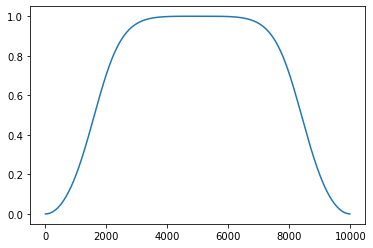

In [7]:
# Plot dengan pencerminan
[w2, h2] = signal.freqz(b,a, fs=10000, whole=True)
plt.plot(w2, abs(h2))

## Soal 4

Desain filter dengan transformasi bilinier, dengan spesifikasi
- Tipe filter: HPF, Elliptic
- Passband ripple: 0.5 db
- Stopband attenuation: 20 db
- $f_c$: 2kHz
- $f_{stop}$: 1 kHz
- $f_s$: 10kHz

## Jawab Soal 4

Seluruh aspek pada soal nomor 4 sama dengan nomor 3. Pembedanya adalah jenis filternya saja. Maka, kita langsung cek orde untuk elliptic. Berdasarkan grafik elliptic, titik titik ($\Omega_{stop}$, $\delta_s$) = (2.2360, 20 db) berada diantara $N=2$ dan $N=3$, sehingga, kita pilih yang $N=3$ 

### Desain Filter Elliptic

In [10]:
rp = 0.5 # passband ripple
rs = 20 # stopband attenuation

be, ae = signal.ellip(3, rp, rs, 2000/5000, btype='highpass') # ingat harus fc / 0.5 fs
print(be)
print(ae)

[ 0.36513974 -0.84052175  0.84052175 -0.36513974]
[ 1.         -0.66761295  0.71410228 -0.02960776]


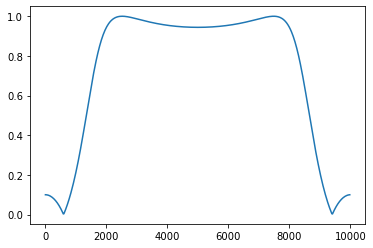

In [9]:
# Plot dengan pencerminan
[w3, h3] = signal.freqz(be,ae, fs=10000, whole=True)
plt.plot(w3, abs(h3))